In [29]:
import json
import csv
import glob
from pathlib import Path

inputpath = glob.glob(str(Path.cwd().parent / "data" / "pages_*.csv"))
inputpath = list(filter(lambda p: Path(p).name.startswith("pages_") and Path(p).name.endswith(".csv"), inputpath))
assert len(inputpath) > 0
inputpath.sort()
inputpath = inputpath[-1]
inputfile = list(csv.reader(open(inputpath, "r")))
header = [word for word in inputfile[0]]
body = inputfile[1:]

dicts = list(map(lambda row: dict(zip(header, row)), body))  # convert to dict
dicts = list(map(lambda elem: {k: (v if v != "" else None) for k, v in elem.items()}, dicts))  # get null

# get elem with least fields being null
elem = min(dicts, key=lambda elem: sum([1 for v in elem.values() if v is None]))

# truncate string values to 100 characters
elem = {k: (v[:100] + "..." if type(v) is str and len(v) > 100 else v) for k, v in elem.items()}

# print json
print(json.dumps(elem, indent=4, sort_keys=True, ensure_ascii=False))

{
    "bautyp": "altbau",
    "boeden": "parkett",
    "company_address": "messendorferstraße 71a8041 graz",
    "company_broker_name": "magdalena tiatco-frank",
    "company_name": "schantl ith immobilientreuhand gmbh",
    "company_reference_id": "267143",
    "company_url": "http://www.schantl-ith.at",
    "description_price": "5759.43",
    "energy_certificate": "d",
    "heizung": "etagenheizung",
    "last_update": "26.08.2024 12:00",
    "links_address": "1200 wien, 20. bezirk, brigittenau, jägerstraße",
    "links_price": "229000.0",
    "links_type": "balkon",
    "maklerprovision": "6870.0",
    "objekttyp": "wohnung",
    "stockwerke": "3",
    "url": "https://www.willhaben.at/iad/immobilien/d/eigentumswohnung/wien/wien-1200-brigittenau/-wow-die-perfe...",
    "verfuegbar": "2027",
    "wohnflaeche": "38.05",
    "zimmer": "2.0",
    "zustand": "renoviert"
}


# sketch schema

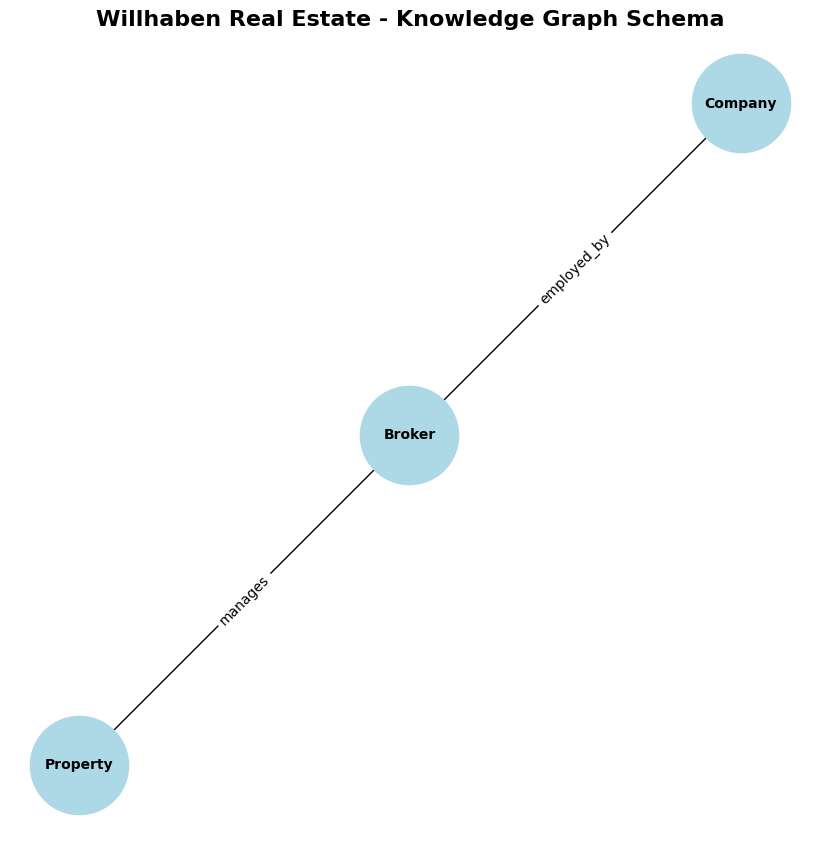

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
plt.figure(figsize=(8, 8))

G.add_edge("Broker", "Company", label="employed_by")
G.add_edge("Broker", "Property", label="manages")


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=5000, font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Willhaben Real Estate - Knowledge Graph Schema", fontsize=16, fontweight="bold")
plt.axis("off")
plt.show()